<a href="https://colab.research.google.com/github/JyzMinaBF/SeoulBikeData_Analysis/blob/main/Seoul_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
seoulbike = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding= 'unicode_escape')

In [ ]:
print(seoulbike.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [ ]:
for i in seoulbike.columns:
  try:
    seoulbike[i] = seoulbike[i].astype(float)
  except:
    pass

In [ ]:
seoulbike_adj = seoulbike[seoulbike["Functioning Day"] != "No"]

In [ ]:
print(seoulbike.describe())

       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   


In [ ]:
numerical_cols = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

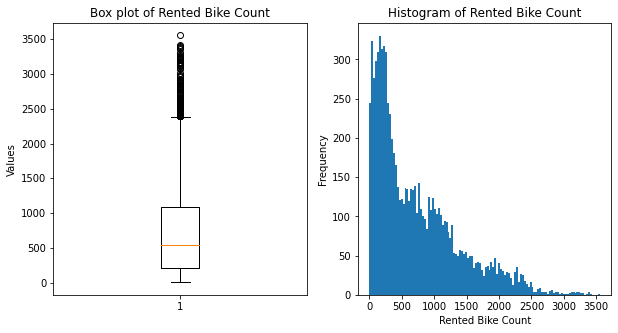

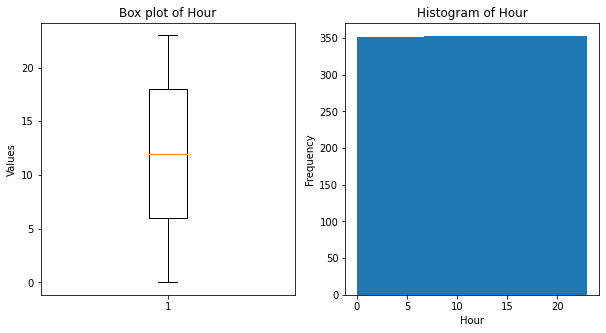

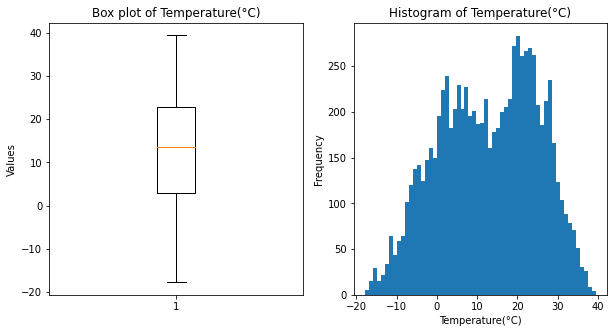

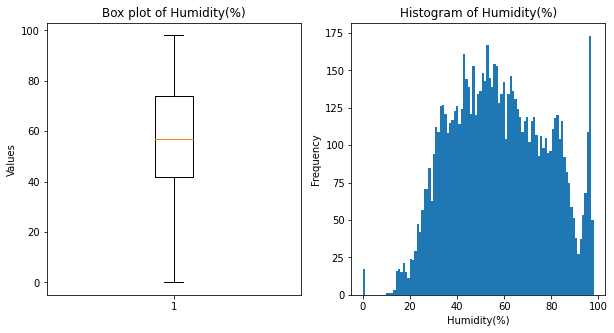

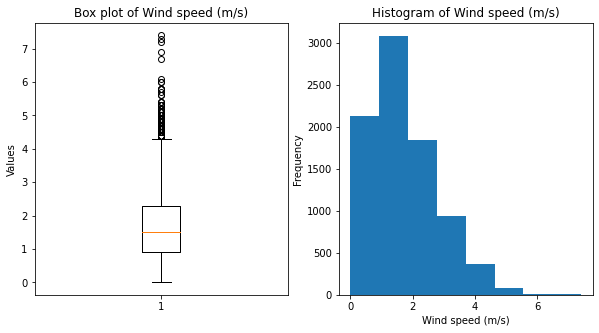

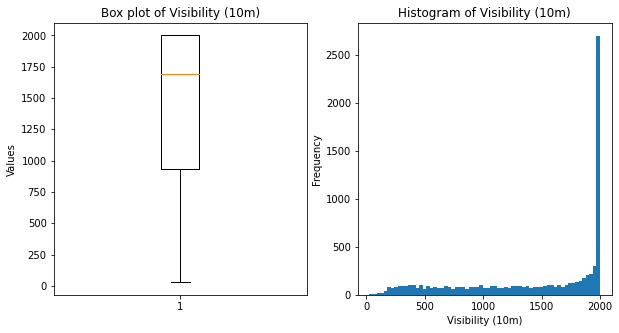

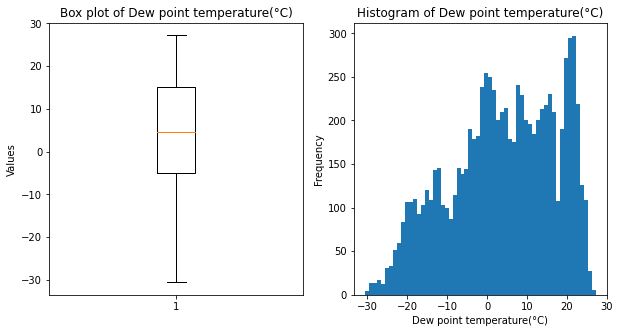

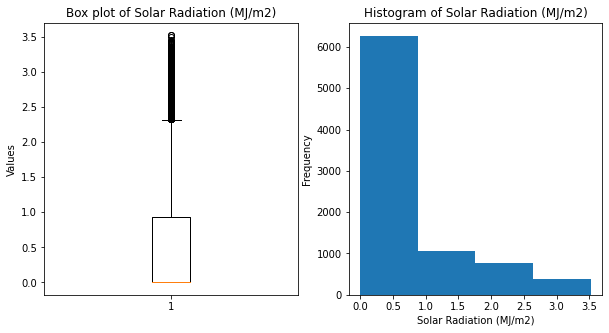

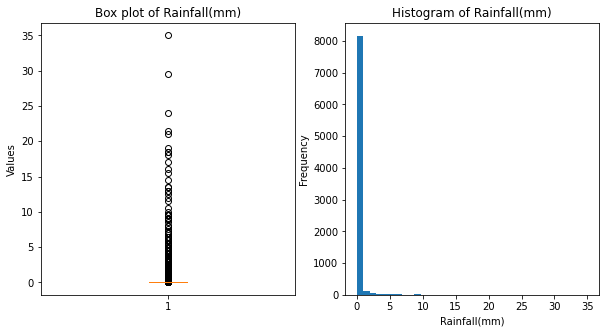

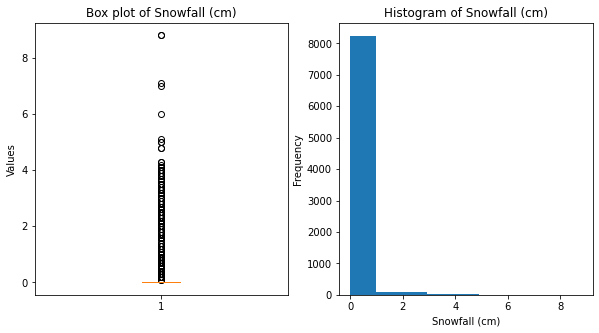

In [ ]:
for i in numerical_cols:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  column_to_plot = i

  # Create the boxplot on the second subplot
  ax1.boxplot(seoulbike_adj[column_to_plot])
  ax1.set_title("Box plot of " + column_to_plot)
  ax1.set_ylabel("Values")

  # Create the histogram on the first subplot
  if max(seoulbike_adj[i])-min(seoulbike_adj[i]) > 1000:
    ax2.hist(seoulbike_adj[column_to_plot], bins=int((max(seoulbike_adj[i])-min(seoulbike_adj[i])+1)/30))
  else:
    ax2.hist(seoulbike_adj[column_to_plot], bins=int((max(seoulbike_adj[i])-min(seoulbike_adj[i])+1)))
  ax2.set_title("Histogram of " + column_to_plot)
  ax2.set_xlabel(column_to_plot)
  ax2.set_ylabel("Frequency")

  # if max(seoulbike_adj[i])-min(seoulbike_ad[i]) > 1000:
  #   seoulbike[i].hist(bins=int((max(seoulbike[i])-min(seoulbike[i])+1)/30))
  # else:
  #   seoulbike[i].hist(bins=int((max(seoulbike[i])-min(seoulbike[i])+1)))

  plt.savefig("/content/drive/MyDrive/Box plot and histogram of " + i[:2])

  # # Set plot title and axis labels
  # plt.title('Histogram of ' + i)
  # plt.xlabel(i)
  # plt.ylabel('Frequency')

  # # Show the plot
  # plt.savefig('Histogram of ' + i)

  # fig = plt.boxplot(seoulbike[i])

  # # Create the box plot using matplotlib


  # # Add a title and axis labels
  # plt.title("Box plot of " + i)
  # plt.xlabel(i)
  # plt.ylabel("Values")

  # # Display the plot


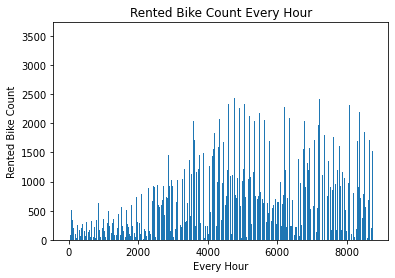

In [ ]:
plt.bar(range(8760), seoulbike['Rented Bike Count'])

plt.xlabel('Every Hour')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count Every Hour')
plt.savefig("/content/drive/MyDrive/Mean of Rented Bike Count Every Hour");

In [ ]:
seoulbike_zero = seoulbike[seoulbike['Rented Bike Count'] == 0]
print(seoulbike_zero.groupby("Date").describe())

KeyError: ignored

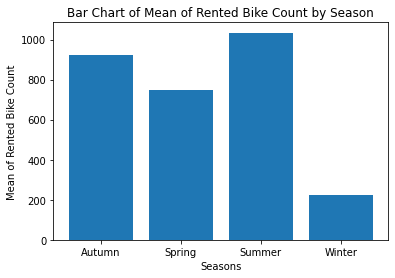

In [ ]:
grouped_data = seoulbike_adj.groupby('Seasons')
mean_of_seasons = grouped_data["Rented Bike Count"].mean()

plt.bar(mean_of_seasons.index, mean_of_seasons.values)

# add labels and title to the chart
plt.xlabel('Seasons')
plt.ylabel('Mean of Rented Bike Count')
plt.title('Bar Chart of Mean of Rented Bike Count by Season')

# display the chart
plt.savefig("/content/drive/MyDrive/Bar Chart of Mean of Rented Bike Count by Season")

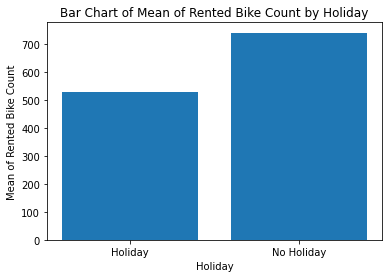

In [ ]:
grouped_data = seoulbike_adj.groupby('Holiday')
mean_of_holiday = grouped_data["Rented Bike Count"].mean()

plt.bar(mean_of_holiday.index, mean_of_holiday.values)

# add labels and title to the chart
plt.xlabel('Holiday')
plt.ylabel('Mean of Rented Bike Count')
plt.title('Bar Chart of Mean of Rented Bike Count by Holiday')

# display the chart
plt.savefig("/content/drive/MyDrive/Bar Chart of Mean of Rented Bike Count by Holiday")

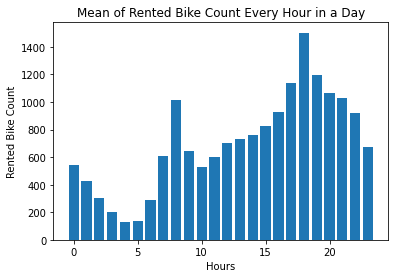

In [ ]:
grouped_data = seoulbike.groupby('Hour')
mean_hour_rentcount = []
for i in range(24):
  mean_hour_rentcount.append(grouped_data.get_group(i)["Rented Bike Count"].describe()["mean"])
6
plt.bar(range(24), mean_hour_rentcount)

plt.xlabel('Hours')
plt.ylabel('Rented Bike Count')
plt.title('Mean of Rented Bike Count Every Hour in a Day')
plt.savefig("/content/drive/MyDrive/Mean of Rented Bike Count Every Hour in a Day");

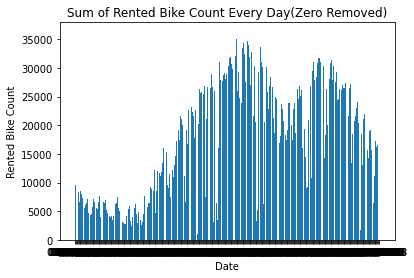

In [ ]:
grouped_data = seoulbike_adj.groupby('Date')
sum_date_rent_count = []
for i in seoulbike_adj["Date"]:
  sum_date_rent_count.append(sum(grouped_data.get_group(i)["Rented Bike Count"]))

plt.bar(seoulbike_adj["Date"], sum_date_rent_count)

plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.title('Sum of Rented Bike Count Every Day(Zero Removed)')
plt.savefig("/content/drive/MyDrive/Sum of Rented Bike Count Every Day(Zero Removed)");

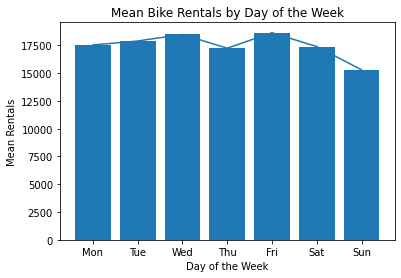

In [ ]:
# Define the number of days in the dataset
num_days = int(8760 / 24)

# Create a list of the mean bike rentals for each day of the week
mean_rentals = [0,0,0,0,0,0,0]
times = [0,0,0,0,0,0,0]
day = 4
for i in range(num_days):
  if seoulbike.iloc[i*24]["Functioning Day"] == "Yes":
    day_rentals = seoulbike[i*24:(i+1)*24]['Rented Bike Count'].sum()
    mean_rentals[day] += day_rentals
    times[day] += 1
  day += 1
  if day == 7:
    day = 0

# Define the labels for the x-axis
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(7):
  mean_rentals[i] = mean_rentals[i]/times[i]

# Create a box plot of the mean rentals by day of the week
plt.plot(np.arange(7), mean_rentals)
plt.xticks(np.arange(7), weekdays)
plt.title("Mean Bike Rentals by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Rentals")

# Display the plot
plt.savefig("/content/drive/MyDrive/Mean Bike Rentals by Day of the Week_line")

plt.bar(np.arange(7), mean_rentals)
plt.xticks(np.arange(7), weekdays)
plt.title("Mean Bike Rentals by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Rentals")

plt.savefig("/content/drive/MyDrive/Mean Bike Rentals by Day of the Week_bar")

In [ ]:
print(seoulbike.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


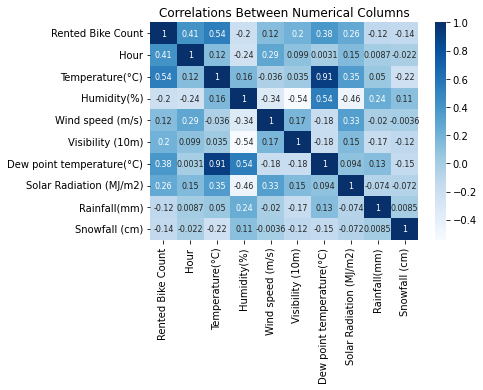

In [ ]:
import seaborn as sns

# Select only the numerical columns
numerical_cols = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Create a correlation matrix
corr_matrix = seoulbike[numerical_cols].corr()

# Create a correlation heat map
sns.heatmap(corr_matrix, annot=True, cmap='Blues', annot_kws={"size": 8})

plt.title("Correlations Between Numerical Columns")

# Show the plot
plt.savefig("/content/drive/MyDrive/Correlations Between Numerical Columns")

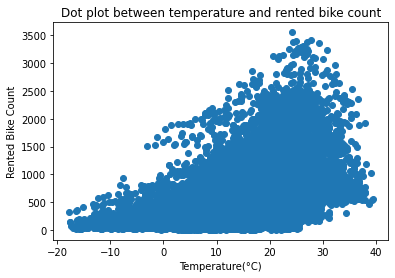

In [ ]:
plt.plot(seoulbike_adj["Temperature(°C)"], seoulbike_adj["Rented Bike Count"], "o")

plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Dot plot between temperature and rented bike count')
plt.savefig("/content/drive/MyDrive/Dot plot between temperature and rented bike count");

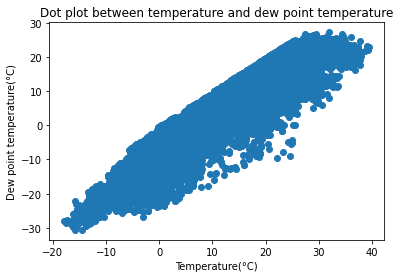

In [ ]:
plt.plot(seoulbike_adj["Temperature(°C)"], seoulbike_adj["Dew point temperature(°C)"], "o")

plt.xlabel('Temperature(°C)')
plt.ylabel('Dew point temperature(°C)')
plt.title('Dot plot between temperature and dew point temperature')
plt.savefig("/content/drive/MyDrive/Dot plot between temperature and Dew point temperature");

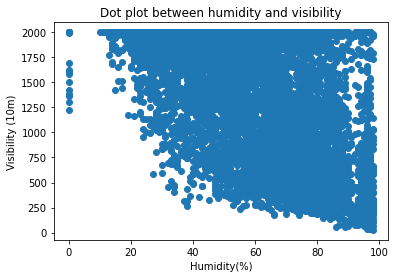

In [ ]:
plt.plot(seoulbike_adj["Humidity(%)"], seoulbike_adj["Visibility (10m)"], "o")

plt.xlabel('Humidity(%)')
plt.ylabel('Visibility (10m)')
plt.title('Dot plot between humidity and visibility')
plt.savefig("/content/drive/MyDrive/Dot plot between humidity and visibility");